In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 20.0 MB/s eta 0:00:0000:01


In [14]:
# !zip -r yolov8_leaf_diseases_exp_dir.zip /kaggle/working/
# !rm -r *

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/yolov8n.pt (deflated 9%)
  adding: kaggle/working/yolov8s.pt (deflated 8%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/confusion_matrix.png (deflated 17%)
  adding: kaggle/working/runs/detect/train/args.yaml (deflated 53%)
  adding: kaggle/working/runs/detect/train/val_batch0_pred.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/F1_curve.png (deflated 7%)
  adding: kaggle/working/runs/detect/train/train_batch2761.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/events.out.tfevents.1717880214.76651e16fa47.34.2 (deflated 88%)
  adding: kaggle/working/runs/detect/train/val_batch1_pred.jpg (deflated 4%)
  adding: kaggle/working

In [8]:
from collections import Counter
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import cv2
import random
from ultralytics import YOLO

## Training using YOLO v8 nano

In [11]:
# model = YOLO("yolov8s.yaml")  
model = YOLO("yolov8s.pt")  

100%|██████████| 21.5M/21.5M [00:00<00:00, 165MB/s]


In [12]:
# Use the model
model.train(data="/kaggle/input/detecting-diseases/data.yaml",
            epochs=70,
            batch=64,
            freeze=0)  # train the model


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/detecting-diseases/data.yaml, epochs=70, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/detecting-diseases/train/labels... 2904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2904/2904 [00:02<00:00, 1036.33it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/detecting-diseases/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/detecting-diseases/valid/labels... 1416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1416/1416 [00:01<00:00, 867.08it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/detecting-diseases/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      15.4G       1.16      3.374      1.517        123        640: 100%|██████████| 46/46 [00:46<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


                   all       1416       3193      0.531      0.584      0.552       0.37


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      15.4G     0.9595      1.436      1.307         93        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]


                   all       1416       3193      0.643      0.589      0.637      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      14.8G      1.004       1.27      1.332        124        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]


                   all       1416       3193      0.509      0.443      0.473      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      15.1G      1.012      1.235      1.346         88        640: 100%|██████████| 46/46 [00:46<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.654      0.596      0.631      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      14.7G     0.9879      1.129      1.331        105        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.09it/s]

                   all       1416       3193      0.704       0.67      0.714      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      14.7G     0.9443      1.039      1.288        104        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.701      0.656        0.7      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      14.8G     0.9221     0.9906      1.277         97        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]

                   all       1416       3193      0.757      0.709      0.776      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      14.7G     0.9174     0.9661      1.268         98        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

                   all       1416       3193      0.778      0.741      0.777      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      15.1G     0.8927     0.9129      1.253        123        640: 100%|██████████| 46/46 [00:46<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]


                   all       1416       3193      0.714      0.729      0.743      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      14.9G     0.8793     0.8865      1.251        130        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.778      0.727      0.789      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      14.9G     0.8524     0.8674       1.23         90        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.778      0.789      0.815      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      14.9G     0.8487     0.8375      1.234        109        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.817      0.791      0.821        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      14.9G     0.8491     0.8086       1.22         91        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.819      0.793      0.836      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      14.9G     0.8265     0.8069      1.219        109        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.822      0.797      0.836      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      14.9G     0.8347     0.7958      1.214        114        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.806      0.794      0.839       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      14.9G     0.8161     0.7662      1.209         82        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.847      0.789      0.847      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      14.9G     0.7961     0.7383      1.185         86        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.846      0.825      0.865      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      14.9G     0.7934     0.7225       1.18        102        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.821      0.791      0.847      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      14.9G     0.7832     0.7267      1.179        100        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.841      0.815      0.869       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      14.9G     0.7803     0.7092      1.175        116        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.808      0.832      0.868       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      14.9G     0.7668     0.6899      1.164        116        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.858       0.82      0.866      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      14.9G      0.764     0.6917      1.165        124        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.842      0.822      0.864      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      14.9G     0.7521     0.6759      1.161        106        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.851      0.824       0.88       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      14.9G     0.7601     0.6573      1.166         87        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.828      0.833      0.873      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      14.9G     0.7514     0.6599      1.163        109        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]

                   all       1416       3193      0.863      0.836      0.883      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      14.9G     0.7419     0.6406      1.153        101        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]

                   all       1416       3193      0.889      0.818      0.886      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      14.9G     0.7372     0.6371      1.154        135        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

                   all       1416       3193      0.882      0.838      0.886      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      14.9G     0.7311      0.623      1.146         90        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

                   all       1416       3193       0.86      0.821      0.879      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      14.9G     0.7342     0.6208      1.145        100        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.868      0.846       0.89      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      14.9G     0.7259     0.6051      1.131        107        640: 100%|██████████| 46/46 [00:46<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

                   all       1416       3193      0.877      0.868      0.906       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      14.9G      0.717     0.5914      1.126        104        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.888      0.858      0.894      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      14.9G     0.7128     0.5797      1.134         76        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.875      0.853      0.895      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      14.9G     0.7023     0.5764      1.121         94        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.867      0.866      0.894       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      14.9G     0.6922      0.579      1.115         88        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]

                   all       1416       3193      0.889      0.842      0.897      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      14.9G     0.6892     0.5634      1.115        131        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.876      0.855      0.889      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      14.9G     0.6859     0.5554       1.11        125        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.894      0.841        0.9      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      14.9G     0.6853     0.5511       1.11         89        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.881      0.879      0.909       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      14.9G     0.6717     0.5329      1.103         88        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.891      0.872      0.907      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      14.9G     0.6633     0.5345        1.1        125        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.888      0.866      0.902      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      14.6G     0.6708     0.5334      1.107         93        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.905      0.863      0.902      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      14.9G      0.658     0.5262        1.1        102        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.906      0.874      0.913      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      14.9G     0.6583     0.5123      1.093        101        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.894      0.864      0.903      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      14.9G     0.6503     0.5131      1.093        114        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.917       0.87      0.913      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      14.9G     0.6483     0.5055       1.09        110        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.914      0.861       0.91      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      14.9G     0.6444      0.503      1.091        105        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.894      0.875      0.909      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      14.9G     0.6528     0.4874      1.088        112        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.906      0.858      0.904      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      14.9G     0.6286     0.4745      1.074        102        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.918      0.863      0.913      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      14.9G     0.6313     0.4859      1.076         99        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.905      0.873      0.915      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      14.9G     0.6223     0.4794      1.073        105        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.899       0.87      0.905      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      14.9G     0.6094     0.4584      1.069         83        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.919      0.873      0.915      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      14.9G     0.6248      0.464      1.077        110        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.919      0.869      0.913      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      14.9G     0.6079     0.4518      1.068         96        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193       0.91      0.881       0.91      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      14.9G     0.5985      0.446      1.061        129        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.907      0.878      0.911      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      14.9G     0.6026     0.4433      1.061        114        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.908      0.883      0.911      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      14.9G     0.5993     0.4386      1.065        117        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193       0.93      0.868      0.916      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      14.9G     0.6018     0.4391      1.064         94        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193       0.92      0.884      0.919      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      14.9G      0.589     0.4343      1.058        109        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.917      0.888      0.916      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      14.9G     0.5948      0.428      1.065         93        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.918      0.887      0.913      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      14.9G     0.5756     0.4183      1.051        124        640: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.917       0.88      0.915      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      14.9G     0.5791     0.4166      1.051        101        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.09it/s]

                   all       1416       3193      0.921      0.889      0.918      0.767


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      14.9G     0.4939      0.338     0.9895         48        640: 100%|██████████| 46/46 [00:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.923      0.883      0.915      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      14.9G     0.4726     0.3043      0.976         67        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.928      0.886      0.917      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      14.9G     0.4661        0.3     0.9729         46        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.934      0.872      0.914      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      14.9G     0.4585     0.2933     0.9675         63        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193       0.93      0.878      0.914       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      14.9G     0.4553     0.2942     0.9668         56        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.937      0.876      0.914      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      14.9G      0.448     0.2881     0.9625         65        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.931      0.885      0.915      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      14.9G     0.4411     0.2774     0.9557         44        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193       0.93      0.884      0.917      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      14.9G     0.4347     0.2733      0.951         54        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.935      0.879      0.916       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      14.9G     0.4332     0.2703      0.953         41        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.936      0.879      0.917      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      14.9G     0.4316     0.2676     0.9508         62        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.938      0.878      0.918       0.78



70 epochs completed in 1.136 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.44s/it]


                   all       1416       3193      0.937      0.878      0.917       0.78
Beans_Angular_LeafSpot         83        277      0.749       0.65      0.685      0.434
            Beans_Rust         97        463      0.862      0.807      0.865      0.634
Strawberry_Angular_LeafSpot        166        193      0.983      0.901      0.967      0.815
Strawberry_Anthracnose_Fruit_Rot         47         85      0.965      0.894      0.946      0.708
Strawberry_Blossom_Blight        104        161      0.977      0.994      0.995      0.916
  Strawberry_Gray_Mold        192        200      0.943      0.904      0.933      0.743
  Strawberry_Leaf_Spot        199        779      0.939      0.848      0.922      0.861
Strawberry_Powdery_Mildew_Fruit         77        151      0.957      0.795      0.866      0.742
Strawberry_Powdery_Mildew_Leaf        155        584        0.9      0.755      0.852      0.775
         Tomato_Blight        100        100      0.986       0.99      0.9

lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▁▁▃▅▄▅▆▆▆▆▇▇▇▇▇▇▇▇█████████████████████
metrics/mAP50-95(B),▂▂▁▃▄▃▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████
metrics/precision(B),▂▁▂▃▄▃▄▅▅▆▅▅▆▆▆▇▆▇▇▇▇▇▇▇█▇█▇█▇▇█████████
metrics/recall(B),▂▂▁▂▄▄▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇█▇███▇█████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▆▆▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▂▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f489a1511b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [13]:
model.save(filename='yolo_v8_50_epochs.pt')

In [7]:
metrics = model.val()  # evaluate model performance on the validation set


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/input/plant-village-yolov8/valid/labels... 2538 images, 48 backgrounds, 0 corrupt: 100%|██████████| 2538/2538 [00:03<00:00, 713.32it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/plant-village-yolov8/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 95, len(boxes) = 24558. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:39<00:00,  4.04it/s]


                   all       2538      24558      0.701      0.668      0.714      0.484
              bad leaf       1678       8191      0.652      0.574      0.612      0.394
             good leaf        847      16367      0.749      0.761      0.816      0.574
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train22


## Inference and Visualization

In [4]:
# model = YOLO("/kaggle/working/yolo_v8_50_epochs.pt")
weights_path = '/kaggle/working/runs/detect/train/weights/last.pt'
model = YOLO(weights_path)  # Load the model with the saved weights

In [5]:
def plot_ground_truth(image_path, label_path, class_index_name_dict):
    image = Image.open(image_path)

    draw = ImageDraw.Draw(image)
    font_size = 25 
    font = ImageFont.truetype("/kaggle/input/arial-ttf/arial.ttf", font_size)
    with open(label_path, 'r') as file:
        for line in file:
            components = line.split()
            index = int(components[0])
            class_name = class_index_name_dict.get(index, "Unknown")

            # Extract bounding box coordinates and convert to pixel values
            x_center, y_center, width, height = map(float, components[1:])
            img_width, img_height = image.size
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            x0 = x_center - width / 2
            y0 = y_center - height / 2
            x1 = x_center + width / 2
            y1 = y_center + height / 2

            # Draw the bounding box
            draw.rectangle([x0, y0, x1, y1], outline="red", width=3)
            draw.text((x0, y0), class_name, fill="red", font=font)
            

    return np.array(image)

/kaggle/input/detecting-diseases/valid/labels/72e0c27a-891e-4864-a473-c44d578ad2ed___RS_Erly-B-7622_JPG_jpg.rf.8ec1b5e9e06fdcfa136b96eeaa004d56.txt

image 1/1 /kaggle/input/detecting-diseases/valid/images/72e0c27a-891e-4864-a473-c44d578ad2ed___RS_Erly-B-7622_JPG_jpg.rf.8ec1b5e9e06fdcfa136b96eeaa004d56.jpg: 640x640 1 Tomato_Blight, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


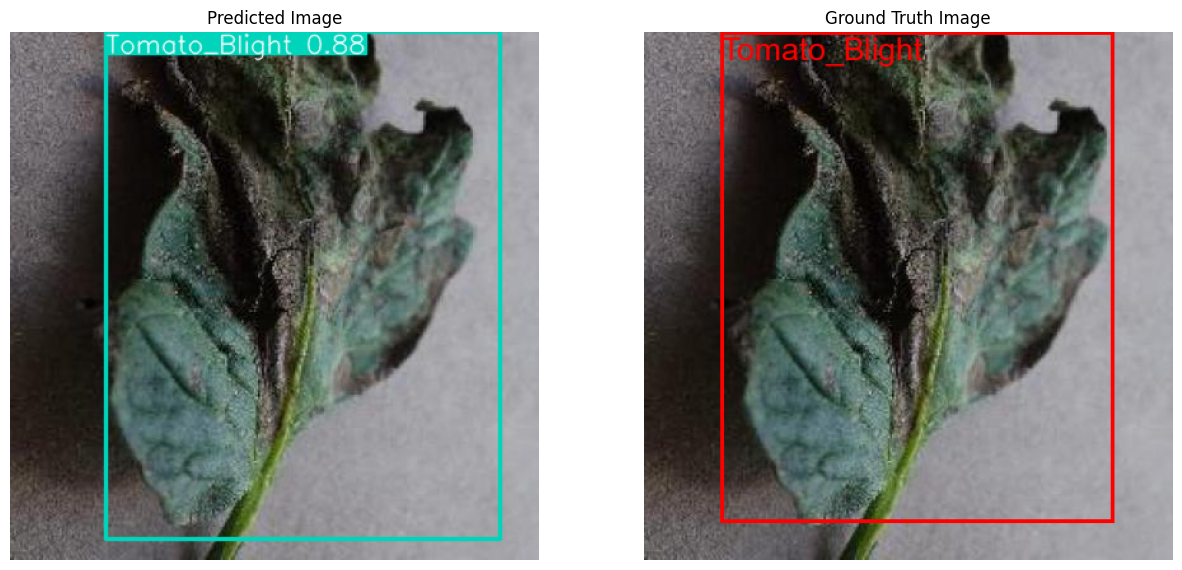

In [12]:
img_prefix = '/kaggle/input/detecting-diseases/valid/images'
txt_prefix = '/kaggle/input/detecting-diseases/valid/labels'

file_name = random.sample(os.listdir('/kaggle/input/detecting-diseases/valid/images'), k=1)[0]
# file_name = 'blossom_blight157_jpg.rf.50b3a4f32de5cdb474570ff03f9abd58.jpg'
txt_filename = os.path.join(txt_prefix, file_name[:-4]+'.txt')
ground_truth_image = plot_ground_truth(os.path.join(img_prefix,file_name),
                 txt_filename,
                  model.names)
print(txt_filename)
with open(txt_filename, 'r') as file:
    for line in file:
        index = line.split()[0]
        class_name = model.names.get(int(index), "Unknown")


results = model.predict(f"{os.path.join(img_prefix,file_name)}")
predicted_image = results[0].plot(show=False)
predicted_image_rgb = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the predicted image
axes[0].imshow(predicted_image_rgb)
axes[0].set_title('Predicted Image')
axes[0].axis('off')

# Plot the ground truth image
axes[1].imshow(ground_truth_image)
axes[1].set_title('Ground Truth Image')
axes[1].axis('off')
plt.axis("off")
plt.show()

## Class weight calculation

In [9]:

# Define the prefix for the label directory
txt_prefix = '/kaggle/input/detecting-diseases/train/labels'

# Initialize a counter to keep track of class instances
class_counter = Counter()

# Iterate over all label files in the directory
for txt_filename in os.listdir(txt_prefix):
    # Construct the full path to the label file
    file_path = os.path.join(txt_prefix, txt_filename)
    
    # Open and read the label file
    with open(file_path, 'r') as file:
        for line in file:
            # Extract the class index (first element in the line)
            class_index = int(line.split()[0])
            # Increment the counter for the class index
            class_counter[class_index] += 1

# Convert the counter to a list of counts (assuming class indices are contiguous and start from 0)
num_classes = max(class_counter.keys()) + 1
class_counts = np.zeros(num_classes, dtype=int)
for class_index, count in class_counter.items():
    class_counts[class_index] = count

# Print the total instances for each class
print("Class Counts:", class_counts)

Class Counts: [ 956 1652  226  166  258  207  821  278  669  352  353  358]


In [12]:
class_name_to_instances = {class_name_map[idx]: count for idx, count in class_counter.items()}


In [11]:
class_name_map = {0: 'Beans_Angular_LeafSpot',
 1: 'Beans_Rust',
 2: 'Strawberry_Angular_LeafSpot',
 3: 'Strawberry_Anthracnose_Fruit_Rot',
 4: 'Strawberry_Blossom_Blight',
 5: 'Strawberry_Gray_Mold',
 6: 'Strawberry_Leaf_Spot',
 7: 'Strawberry_Powdery_Mildew_Fruit',
 8: 'Strawberry_Powdery_Mildew_Leaf',
 9: 'Tomato_Blight',
 10: 'Tomato_Leaf_Mold',
 11: 'Tomato_Spider_Mites'}

In [14]:
# Calculate the total number of instances
names = [
    'Beans_Angular_LeafSpot',
    'Beans_Rust',
    'Strawberry_Angular_LeafSpot',
    'Strawberry_Anthracnose_Fruit_Rot',
    'Strawberry_Blossom_Blight',
    'Strawberry_Gray_Mold',
    'Strawberry_Leaf_Spot',
    'Strawberry_Powdery_Mildew_Fruit',
    'Strawberry_Powdery_Mildew_Leaf',
    'Tomato_Blight',
    'Tomato_Leaf_Mold',
    'Tomato_Spider_Mites'
]

total_instances = sum(class_name_to_instances.values()) 

# Calculate class weights based on the inverse frequency
class_weights = {class_name: total_instances / (len(class_name_to_instances) * count) for class_name, count in class_name_to_instances.items()}

# Reorder the class weights according to the 'names' list
ordered_class_weights = [class_weights[class_name] for class_name in names]

# Print the ordered class weights
print("Ordered Class Weights:", ordered_class_weights)

Ordered Class Weights: [0.5488145048814504, 0.31759483454398707, 2.321533923303835, 3.1606425702811247, 2.03359173126615, 2.534621578099839, 0.6390580592773041, 1.8872901678657075, 0.7842551071250623, 1.490530303030303, 1.486307837582625, 1.4655493482309125]


In [ ]:
/kaggle/input/detecting-diseases-weighted/valid/labels/blossom_blight157_jpg.rf.50b3a4f32de5cdb474570ff03f9abd58.txt